# Módulo 7 - Regressão Linear Simples


In [149]:
"""Lista de Importação de todos os módulos que serão utilizado no notebook"""

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score, mean_absolute_error

from scipy.stats import shapiro, kstest, probplot, zscore
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from statsmodels.graphics.gofplots import qqplot

import pingouin as pg

import sklearn

from sklearn.metrics import root_mean_squared_error

### Carga dos Dados



In [150]:
# carregar o dataset e checar sua estrutura
df_distancia = pd.read_csv('./datasets/Combustivel_distancia.csv')
df_distancia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   combustivel_litros       188 non-null    float64
 1   distancia_percorrida_km  188 non-null    float64
dtypes: float64(2)
memory usage: 3.1 KB


In [151]:
# exibir as primeiras linhas
df_distancia.head()

,combustivel_litros,distancia_percorrida_km
0,13.1,157.2
1,28.5,341.1
2,5.9,70.9
3,11.8,141.7
4,22.4,267.4


### Análise Exploratória de Dados



Nesta aula, exploramos a Análise Exploratória de Dados (EDA) para um conjunto de dados que contém informações sobre litros de combustivel e distância percorrida. Começamos analisando as medidas estatísticas das variáveis, como média, mediana e desvio padrão. Em seguida, utilizamos um gráfico de dispersão para visualizar a relação entre as variáveis. Observamos que há uma relação forte entre as litros de combustivel e a distância percorrida, mas não é uma relação linear perfeita. Também verificamos a presença de outliers usando um boxplot e constatamos que não há outliers nos litros de combustivel ou na distância percorrida. Além disso, calculamos a correlação entre as variáveis e constatamos que há uma correlação forte entre elas. Por fim, analisamos a distribuição das variáveis usando histogramas. Com base nessas análises, concluímos que um modelo de regressão linear simples pode ser adequado para prever a distância percorrida com base nos litros de combustivel.



In [152]:
# Medidas estatísticas das variáveis
df_distancia.describe()

,combustivel_litros,distancia_percorrida_km
count,188.000000,188.000000
mean,16.961170,203.404255
std,7.546861,90.453558
min,5.000000,60.000000
25%,10.275000,123.425000
50%,16.750000,200.850000
75%,23.225000,278.800000
max,30.000000,359.900000


<Axes: xlabel='combustivel_litros', ylabel='distancia_percorrida_km'>

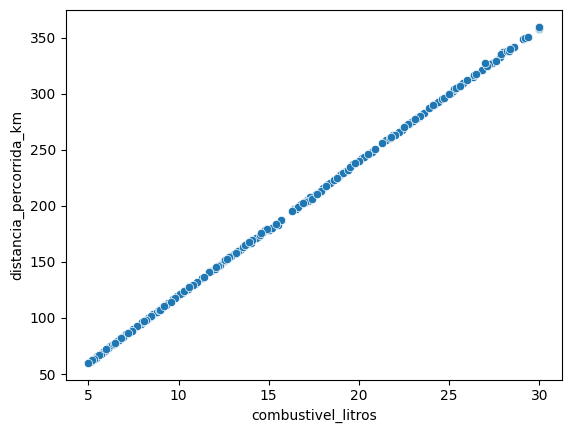

In [ ]:
# plot de dispersão
# X = combustivel_litros
# Y = distância percorrida
sns.scatterplot(data=df_distancia, x="combustivel_litros", y="distancia_percorrida_km")

<Axes: ylabel='distancia_percorrida_km'>

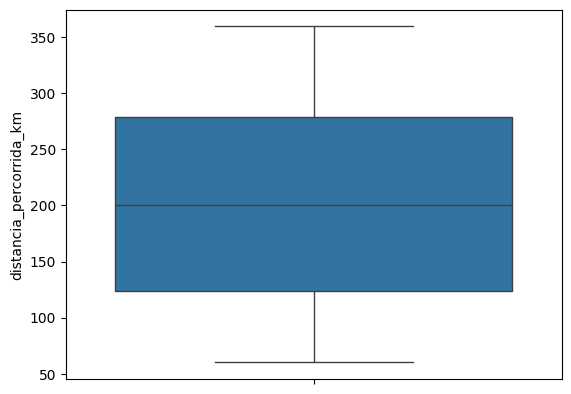

In [154]:
# Verificação preliminar de outliers - plot boxplot
sns.boxplot(df_distancia, y="distancia_percorrida_km")

<Axes: >

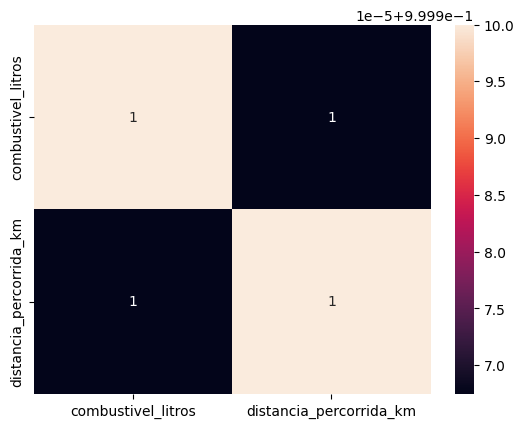

In [155]:
# verificar correlação - Pearson (para regressão linear)
sns.heatmap(df_distancia.corr("pearson"), annot=True)

<Axes: >

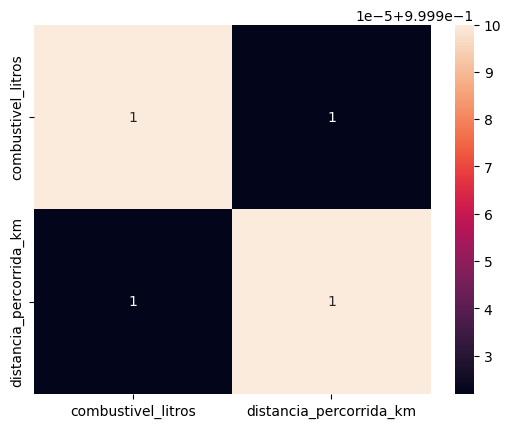

In [156]:
# verificar correlação - Spearman (relações não lineares)
sns.heatmap(df_distancia.corr("spearman"), annot=True)

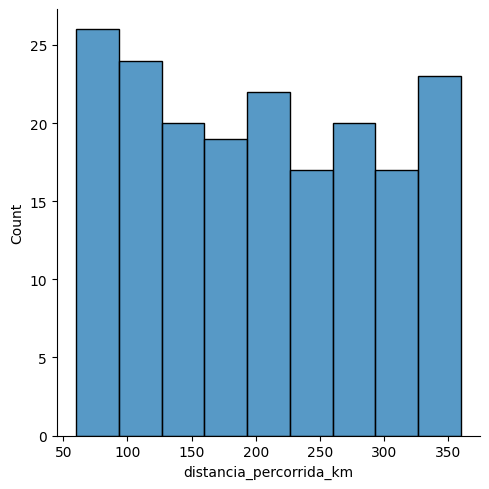

In [157]:
# Histograma das variaáveis - distribuição da distancia percorrida
sns.displot(df_distancia, x="distancia_percorrida_km")

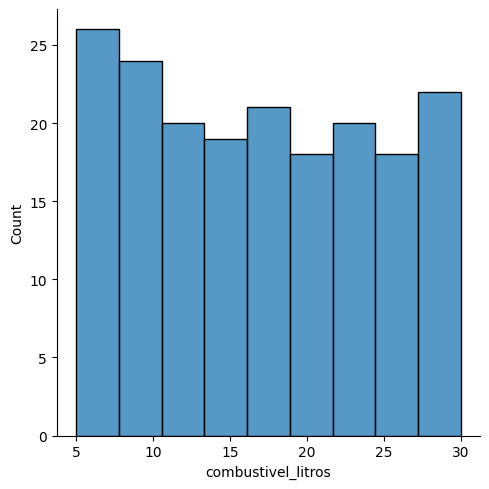

In [158]:
# Histograma das variaáveis - distribuição do combustivel litros
sns.displot(df_distancia, x="combustivel_litros")

### Treinamento do Modelo



A primeira etapa é dividir os dados entre treino e teste. Para isso, criamos duas estruturas para armazenar as variáveis independentes (X) e dependentes (Y). Em seguida, utilizamos a função `train_test_split()` para dividir o dataset em treino e teste, definindo que 30% dos dados serão usados para teste e 70% para treinamento. Após a divisão, instanciamos o modelo de regressão linear e treinamos o modelo utilizando o conjunto de treinamento. Por fim, imprimimos a equação da reta resultante, que representa a relação entre as variáveis X e Y.



In [159]:
# dividir dataset entre treino e teste
# quando temos apenas uma feature (variável), é necessário ajustar o formato (shape)
X = df_distancia["combustivel_litros"].values.reshape(-1, 1)
Y = df_distancia["distancia_percorrida_km"].values.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=50
)

In [160]:
# instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [161]:
# treinar o modelo
reg_model.fit(X_train, Y_train)

LinearRegression()

In [162]:
# imprimir a equação da reta - y = ax + b
print(
    "A equação da reta é y = {:4f}x + {:4f}".format(
        reg_model.coef_[0][0], reg_model.intercept_[0]
    )
)

A equação da reta é y = 11.978304x + 0.225517


### Validação do Modelo



#### Análise Métricas - MAE e MSE



Primeiro, calcularemos os valores preditos com base no conjunto de testes para verificar se o modelo está fazendo boas previsões em dados não observados durante o treinamento. Usaremos métricas como R-squared, que mede a proporção da variação explicada pela variável independente, e Mean Absolute Error (MAE), que calcula a diferença média entre os valores preditos e os valores reais. O MAE é uma métrica fácil de interpretar e menos sensível a outliers. Vamos calcular essas métricas e interpretar os resultados.



In [163]:
# Predição dos valores baseado no conjunto de testes
Y_pred = reg_model.predict(X_test)

In [164]:
# Calcular métrica R-squad ou coeficiente de Determinação
# R2 representa a proporção na variação dentro da variável dependente, explicada pela variável indenpendente
r2_score(Y_test, Y_pred)

0.9999497191252986

In [165]:
# Calcular métrica MAE (Mean Absolute Error)
# MAE = Média (Y_test - Y_pref)
# Fácil de interpretar e menos sensível a outliers
mean_absolute_error(Y_test, Y_pred)

0.41393998532335663

0.41 pontos de erro é um número aceitável? Digamos que nesse caso sim. (Normalmente depende do cliente)

In [166]:
# Calcular métrica MSE (Mean Squared Error)
# MSE = Média (Y_test - Y_pref)^2
# Não é fácil de interpretar, mais sensível a outliers e penaliza grandes errros
mse = np.mean((Y_test - Y_pred) ** 2)
print(f'MSE: {mse}')

MSE: 0.41696087522007896


#### Análise Métricas - RMSE



Aqui aplicamos o conceito de RMSE (Root Mean Squared Error), que é uma métrica que penaliza os grandes erros, mas é fácil de interpretar. Explicamos que o cálculo do RMSE é semelhante ao MSE (Mean Squared Error), mas com a diferença de que é aplicada uma raiz quadrada no resultado. Demonstramos como calcular o RMSE e como interpretar seus valores. Em seguida, fizemos uma análise gráfica simples para visualizar os dados preditos e reais do conjunto de teste. Concluímos que é importante observar as diferenças entre os valores preditos e reais, tanto através das métricas quanto visualmente, para avaliar a performance do modelo.



In [167]:
# Calcular métrica RMSE (Root Mean Squared Error)
# É semelhante ao MSE, mas é aplicado uma raiz quadrada no resultado.
# É fácil de interpretar.
# É bom porque ele penaliza os grandes erros do MSE, mas consegue ter a informação na mesma escala da sua variável resposta.
mse = np.mean((Y_test - Y_pred) ** 2)  # Calcula o Mean Squared Error
rmse = np.sqrt(mse)  # Calcula a raiz quadrada do MSE
print(f"RMSE: {rmse}")

RMSE: 0.645725077118799


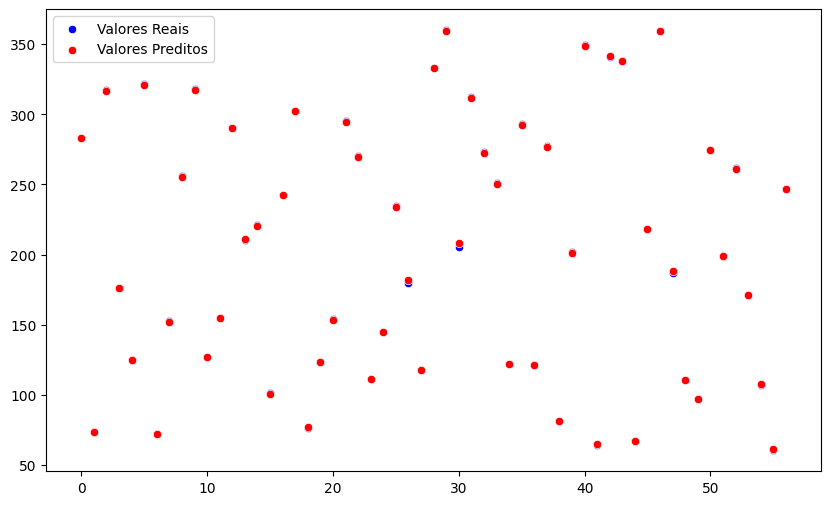

In [168]:
# análise gráfica
x_axis = range(len(Y_test))
plt.figure(figsize=(10, 6))
# reshape = transforma os dados num array unidimensional
sns.scatterplot(x=x_axis, y=Y_test.reshape(-1),
                color="blue", label="Valores Reais")
sns.scatterplot(x=x_axis, y=Y_pred.reshape(-1),
                color="red", label="Valores Preditos")
plt.legend()
plt.show()

#### Análise Gráfica de Resíduos



Nesta aula, vamos realizar a análise de resíduos para validar nosso modelo de regressão. Os resíduos são os erros do modelo, ou seja, a diferença entre os valores reais e os valores previstos. Vamos calcular os resíduos e convertê-los para uma escala padronizada. Em seguida, faremos uma análise gráfica dos resíduos para verificar a linearidade e a homogeneidade das variâncias. Observamos que os resíduos não estão totalmente dentro do intervalo esperado para a linearidade e que há padrões nos dados, indicando que o modelo pode não ser adequado. Além disso, faremos testes estatísticos de normalidade nos resíduos.



In [169]:
# calcular os resíduos
residues = Y_test - Y_pred

In [170]:
# calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - media) / desvio_padrão
# O zsocre basicamente faz esse cálculo para nós
residues_std = zscore(residues)

**Verificar linearidade do modelo:**

- Se o modelo estiver entre -2 e +2 (na escala padrão) - indica linearidade dos resíduos

**Verificar homogeneidade das variâncias (Homocedasticidade)**

- Valores estiverem em torno da reta, temo homocedasticidade, caso contrário se houver alguma tendência ou padrão (formam um cone ou funil), há heterocedasticidade.



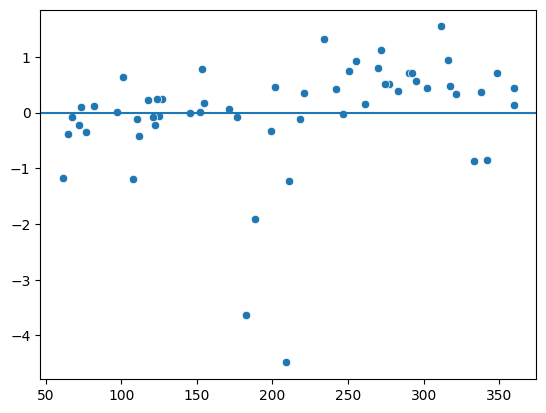

In [171]:
sns.scatterplot(x=Y_pred.reshape(-1), y=residues_std.reshape(-1))
plt.axhline(y=0)

- Podemos ver na análise do gráfico, que existem pontos que não estão na escala padrão, principalmente, na parte negativa do gráfico (valores que passam o -2).
- Também chegamos a conclusão, de que, ocorre homocedasticidade, porém existem alguns valores que se distanciam, então ela não está ocorrendo como deveria.
- Ou seja, esse modelo, não conseguiu capturar muito bem os padrões, para que possamos fazer predições, por mais que as métricas nos digam outra coisa.

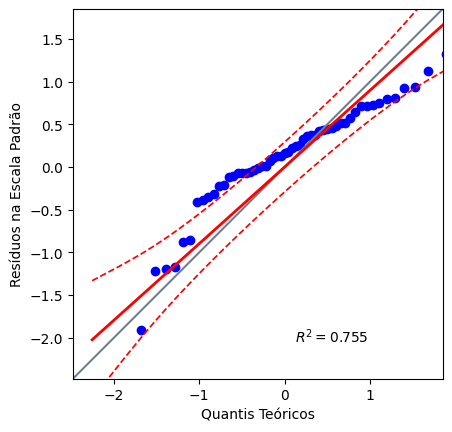

In [172]:
# Checar se resíduos seguem uma distribuição normal
# QQ (Quantile-Quantile) Plot, que avalia se uma amostra segue uma distribuição normal.
pg.qqplot(residues_std, dist="norm", confidence=0.95)
plt.xlabel("Quantis Teóricos")
plt.ylabel("Resíduos na Escala Padrão")
plt.show()

Pelo ponto de vista da análise gráfica dos resíduos, este modelo pode não satisfazer predições pois os pontos deveriam estar em cima da reta, mas existem alguns valores muito afastados e saindo da nossa banda de confiança.



#### Teste de Normalidade de Resíduos



Nesta aula, discutimos sobre a importância da validação técnica e de negócio em modelos de regressão linear. Realizamos dois testes estatísticos de normalidade: o teste de Shapiro-Wilks e o teste de Kolmogorov-Smirnov. O teste de Shapiro-Wilks nos permite verificar se os resíduos do modelo seguem uma distribuição normal. Já o teste de Kolmogorov-Smirnov nos ajuda a validar se os resíduos seguem uma distribuição normal específica, como a distribuição normal. Analisamos os resultados desses testes, considerando o valor de p-valor. Se o p-valor for maior que 0.05, não rejeitamos a hipótese nula de que os resíduos seguem uma distribuição normal. Caso contrário, rejeitamos a hipótese nula. Discutimos também outras abordagens que podem ser utilizadas para melhorar o modelo, como a obtenção de mais dados e a utilização de validação cruzada com K-fold. Por fim, ressaltamos a importância de validar o modelo com especialistas no domínio do problema e considerar outras variáveis que possam explicar melhor os resultados.



In [173]:
# Teste de normalidade - Shapiro Wilk
# H0 - segue distribuição normal
# H1 - não segue distribuição normal
# se p-valor > 0.05 não rejeita H0, caso contrário, rejeitamos:
stat_shapiro, p_value_shapiro = shapiro(residues.reshape(-1))
print(
    "Estatística do teste: {:.4f} e p-value: {:.4f}".format(
        stat_shapiro, p_value_shapiro
    )
)

Estatística do teste: 0.7709 e p-value: 0.0000


In [174]:
# Teste de normalidade - Kolmogorov-Smirnov
# H0 - segue distribuição normal
# H1 - não segue distribuição normal
# se p-valor > 0.05 não rejeita H0, caso contrário, rejeitamos:
stat_ks, p_value_ks = kstest(residues.reshape(-1), "norm")
print(
    "Estatística do teste: {:.4f} e p-value: {:.10f}".format(stat_ks, p_value_ks))

Estatística do teste: 0.2711 e p-value: 0.0003421891


Apesar do teste de normalidade Shapiro Wilk não rejeitar o H0, O teste de normalidade de Kolmogorov-Smirnov, ao contrário rejeita a distribuição normal, dentro deste universo amostral e do problema levantado. É possível que uma maior obtenção de dados seja necessária.



### Fazendo Predições



Primeiro, calculamos a distancia prevista para um determinado número de litros de combustivel, usando o método predict do modelo. Em seguida, discutimos a importância de avaliar o erro das previsões e como isso pode afetar a tomada de decisões. Também exploramos como inverter a equação da reta para determinar quantos litros de combustivel são necessárias para atingir uma determinada distância em km. Por fim, aprendemos a salvar o modelo treinado em um arquivo para uso posterior. Após isso, utilizaremos esse modelo salvo para fazer previsões através de uma API.



In [175]:
# quantos km vamos conseguir andar com 15 litros de gasolina?
predicted_distance = reg_model.predict([[15]])[0]
predicted_distance_scalar = predicted_distance.item()

formatted_distance = "{:.2f}".format(predicted_distance_scalar)
print(f"km previsto: {formatted_distance}")

km previsto: 179.90


In [176]:
# quantos litros vamos utilizar para uma viagem de 125km?
# y = ax + b
# y - b = ax
# (y - b) / a = x
# x = (y - b) / a
predicted_hours = (125 - reg_model.intercept_[0]) / reg_model.coef_[0][0]
print(f"Quantidade de litros necessária: {predicted_hours:.2f}")

Quantidade de litros necessária: 10.42


### Salvar modelo



In [177]:
import joblib

joblib.dump(reg_model, "./modelo_regressao_combustivel_distancia.plk")

['./modelo_regressao_combustivel_distancia.plk']